In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\AP\Desktop\states_all.csv')

In [3]:
df.head(1)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN


In [7]:
# Fill nulls using interpolate because data is time series

fill_list = ['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G']

for col in fill_list:
    df.loc[:, col].interpolate(inplace=True)
    
# Drop nulls after interpolation
df.dropna(inplace=True)

--------------------------------------------------------

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

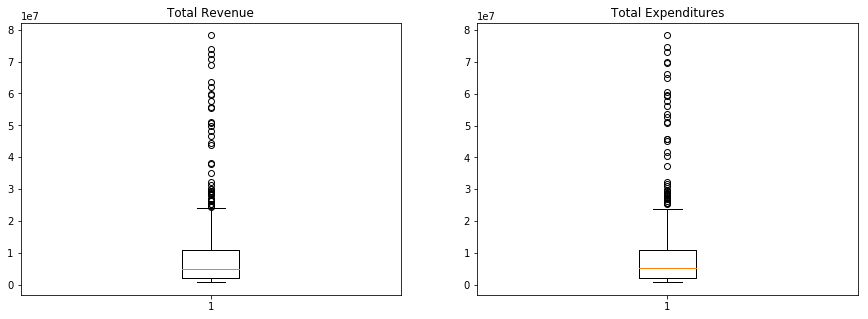

In [13]:
# Boxplots

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(df["TOTAL_REVENUE"])
plt.title("Total Revenue")

plt.subplot(1,2,2)
plt.boxplot(df["TOTAL_EXPENDITURE"])
plt.title("Total Expenditures")
plt.show()

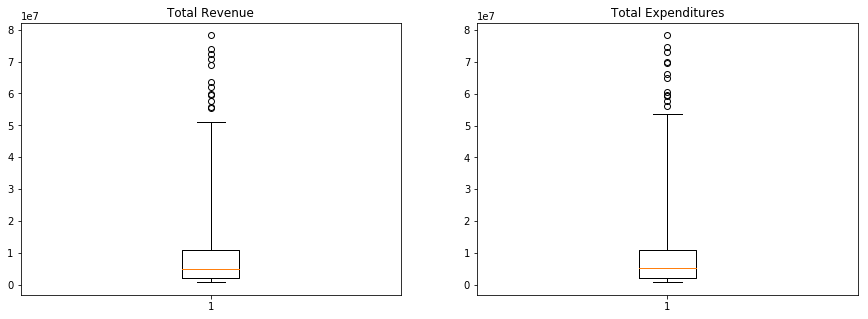

In [11]:
# Boxplot with whiskers=5

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(df["TOTAL_REVENUE"], whis=5)
plt.title("Total Revenue")

plt.subplot(1,2,2)
plt.boxplot(df["TOTAL_EXPENDITURE"], whis=5)
plt.title("Total Expenditures")
plt.show()

Yes, these columns have outliers, even when adjusting the whiskers.

-----------------------------------------

2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [16]:
# Winsorize columns

from scipy.stats.mstats import winsorize

winsorized_revenue = winsorize(df["TOTAL_REVENUE"], (0, 0.05))

winsorized_expenditure = winsorize(df["TOTAL_EXPENDITURE"], (0, 0.05))

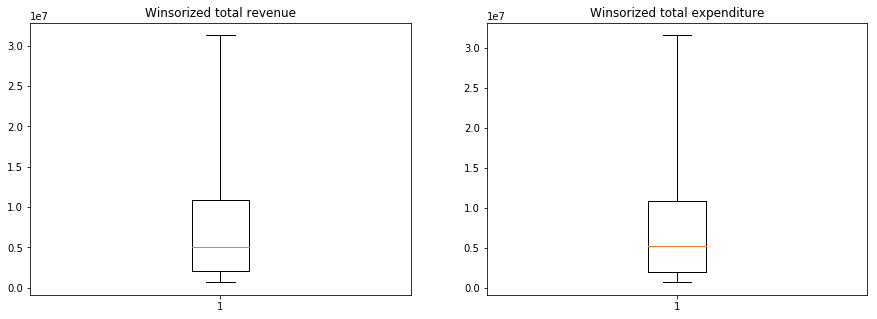

In [20]:
# Boxplot of winsorized columns to check if outliers still there

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue, whis=5)
plt.title("Winsorized total revenue")

plt.subplot(1,2,2)
plt.boxplot(winsorized_expenditure, whis=5)
plt.title("Winsorized total expenditure")
plt.show()

Outliers have been eliminated by winsorizing columns then verify with boxplots after winsorization.

-----------------------------------

3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [25]:
# Create new variable

Budet_deficit = df.TOTAL_REVENUE - df.TOTAL_EXPENDITURE

In [34]:
# Create new variable

budget_deficit = df.TOTAL_REVENUE - df.TOTAL_EXPENDITURE

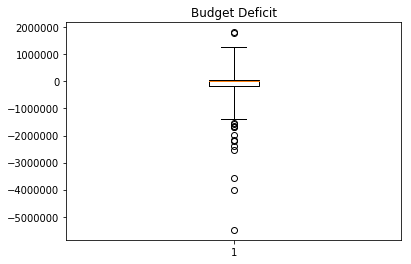

In [43]:
plt.boxplot(budget_deficit, whis=5)
plt.title("Budget Deficit");

Yes, new column contains outliers even when adjusting the whiskers to 5.

In [36]:
# Winsorize new varialbe

winsorized_budget = winsorize(Budget_deficit, (0.05, 0.05))

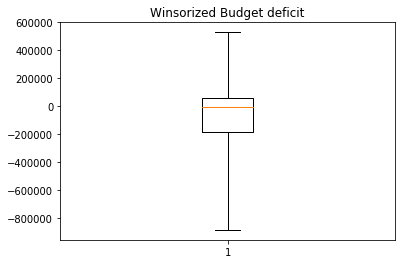

In [37]:
# Boxplot of winsorized budget deficit

plt.boxplot(winsorized_budget, whis=5)
plt.title("Winsorized Budget deficit");

After winsorizing the new budget deficit variable and applying 5 to whiskers, outliers have been eliminated. 

------------------------------------

4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [38]:
budget_deficit2 = winsorized_revenue - winsorized_expenditure

Text(0.5, 1.0, 'Budget deficit 2')

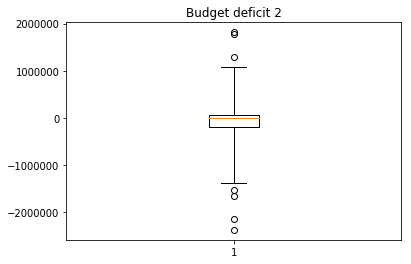

In [39]:
plt.boxplot(budget_deficit2, whis = 5)
plt.title("Budget deficit 2")

Outlier values detected.

In [40]:
winsorized_budget2 = winsorize(budget_deficit2, (0.05, 0.05))

Text(0.5, 1.0, 'Winsorized budget deficit 2')

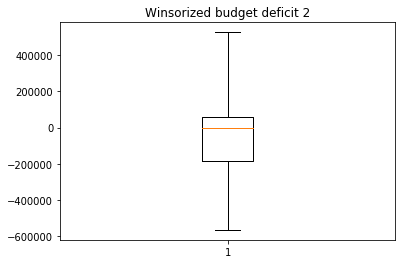

In [41]:
plt.boxplot(winsorized_budget2, whis = 5)
plt.title("Winsorized budget deficit 2")

Outliers eliminated.

-------------------------------------

5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [42]:
pd.DataFrame({"original_budget": budget_deficit, "winsorized_budget1": winsorized_budget,
              "winsorized_budget2": winsorized_budget2}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,4.670000e+02,467.000000,467.000000
mean,-9.384869e+04,-62095.426124,-34264.777302
std,5.679796e+05,316055.598089,248581.764376
min,-5.487742e+06,-882032.000000,-563852.000000
25%,-1.810570e+05,-181057.000000,-184681.500000
50%,-1.322000e+03,-1322.000000,-2092.000000
75%,6.380350e+04,63803.500000,57169.500000
max,1.816932e+06,530090.000000,525512.000000


Budget 2 seems to be closer to the original budget looking at the mean and standard deviation.

6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

The method in the 4th question seems to produce data closer to the original than using the method in question 3.